In [2]:
import pandas
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
data = {'CGPA':['g9','g8','g9','l8','g8','g9','l8','g9','g8','g8'],
 'Inter':['Y','N','N','N','Y','Y','Y','N','Y','Y'],
 'PK':['+++','+','==','==','+','+','+','+++','+','=='],
 'CS':['G','M','P','G','M','M','P','G','G','G'],
 'Job':['Y','Y','N','N','Y','Y','N','Y','Y','Y']}
table=pandas.DataFrame(data,columns=["CGPA","Inter","PK","CS","Job"])
table.where(table["CGPA"]=="g9").count()
encoder=LabelEncoder()

In [4]:
table

,CGPA,Inter,PK,CS,Job
0,g9,Y,+++,G,Y
1,g8,N,+,M,Y
2,g9,N,==,P,N
3,l8,N,==,G,N
4,g8,Y,+,M,Y
5,g9,Y,+,M,Y
6,l8,Y,+,P,N
7,g9,N,+++,G,Y
8,g8,Y,+,G,Y
9,g8,Y,==,G,Y


In [5]:
for i in table:
 table[i]=encoder.fit_transform(table[i])
table

,CGPA,Inter,PK,CS,Job
0,1,1,1,0,1
1,0,0,0,1,1
2,1,0,2,2,0
3,2,0,2,0,0
4,0,1,0,1,1
5,1,1,0,1,1
6,2,1,0,2,0
7,1,0,1,0,1
8,0,1,0,0,1
9,0,1,2,0,1


In [6]:
X=table.iloc[:,0:4].values
y=table.iloc[:,4].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=0)
y_test

array([0, 1, 1, 1])

In [7]:
model=DecisionTreeClassifier(criterion='entropy', max_depth=3)
model = model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [8]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print([1,0,0,1])

Accuracy: 0.75
[[0 1]
 [0 3]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.75      1.00      0.86         3

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4

[1, 0, 0, 1]


/home/machine/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
if model.predict([[1,0,0,1]])==1:
 print("Got JOB")
else:
 print("Didn’t get JOB")
 print([2,0,2,0])
if model.predict([[2,0,2,0]])==1:
 print("Got JOB")
else:
 print("Didn’t get JOB")

Got JOB
Didn’t get JOB


In [10]:
pip install graphviz

     |████████████████████████████████| 46 kB 411 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [11]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import graphviz

In [12]:
df = pd.read_csv('car_evaluation.csv', header=None)
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names

In [16]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [13]:
le = preprocessing.LabelEncoder()
dataset = df.apply(le.fit_transform)

In [14]:
X= dataset.iloc[: , : -1].values
y= dataset.iloc[ : , -1].values

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.20,random_state=2)
model=DecisionTreeClassifier(criterion='gini', max_depth=3) 
model = model.fit(X_train,y_train)

In [17]:
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7601156069364162
[[ 60   0  12   0]
 [ 18   0   0   0]
 [ 45   0 203   0]
 [  8   0   0   0]]
              precision    recall  f1-score   support

           0       0.46      0.83      0.59        72
           1       0.00      0.00      0.00        18
           2       0.94      0.82      0.88       248
           3       0.00      0.00      0.00         8

    accuracy                           0.76       346
   macro avg       0.35      0.41      0.37       346
weighted avg       0.77      0.76      0.75       346



/home/machine/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [92]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.35,random_state=2)
model=DecisionTreeClassifier(criterion='gini', max_depth=3) 
model = model.fit(X_train,y_train)

In [93]:
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7619834710743801
[[113   0  16   0]
 [ 26   0   0   0]
 [ 82   0 348   0]
 [ 20   0   0   0]]
              precision    recall  f1-score   support

           0       0.47      0.88      0.61       129
           1       0.00      0.00      0.00        26
           2       0.96      0.81      0.88       430
           3       0.00      0.00      0.00        20

    accuracy                           0.76       605
   macro avg       0.36      0.42      0.37       605
weighted avg       0.78      0.76      0.75       605



/home/machine/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 11248 tasks      | elapsed:    4.2s


Best paramters: {'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'})
Train Result:
Accuracy Score: 99.78%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1      2          3  accuracy    macro avg  \
precision    0.990476   1.000000    1.0   1.000000  0.997829     0.997619   
recall       1.000000   0.960784    1.0   0.982456  0.997829     0.985810   
f1-score     0.995215   0.980000    1.0   0.991150  0.997829     0.991591   
support    312.000000  51.000000  962.0  57.000000  0.997829  1382.000000   

           weighted avg  
precision      0.997850  
recall         0.997829  
f1-score       0.997817  
support     1382.000000  
_______________________________________________
Confusion Matrix: 
 [[312   0   0   0]
 [  2  49   0   0]
 [  0   0 962   0]
 [  1   0   0  56]]

Test Result:
Accuracy Score: 98.84%
_______________________________________________
CLASSIFICATION REPOR

[Parallel(n_jobs=-1)]: Done 12996 out of 12996 | elapsed:    4.6s finished


In [18]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=3)
model = clf.fit(X, y)

In [19]:
import numpy as np
feature_names= ['Buying', 'Maintenance', 'Doors', 'Persons', 'Luggage_Boot', 'Safety']
target_names= np.array(['unacc', 'acc', 'good', 'vgood'])

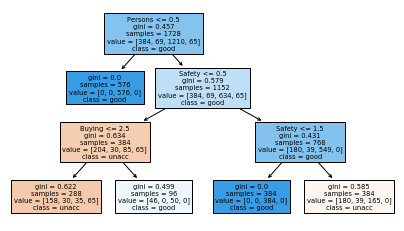

In [20]:

fig = plt.figure(figsize=(7,4))
decistion_tree = tree.plot_tree(clf,feature_names=feature_names, class_names=target_names,filled=True)
plt.show()
 

In [94]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=2, random_state=42)
scores = cross_val_score(clf, X, y, cv=10)
scores

array([0.71098266, 0.68208092, 0.78034682, 0.71098266, 0.74566474,
       0.73410405, 0.73410405, 0.70520231, 0.72674419, 0.70348837])

In [95]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.72 accuracy with a standard deviation of 0.03


In [91]:
X.shape


(1728, 6)

In [29]:
y.shape

(1728,)

In [43]:
from sklearn.tree import DecisionTreeRegressor

In [87]:
model = DecisionTreeRegressor(random_state=5)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

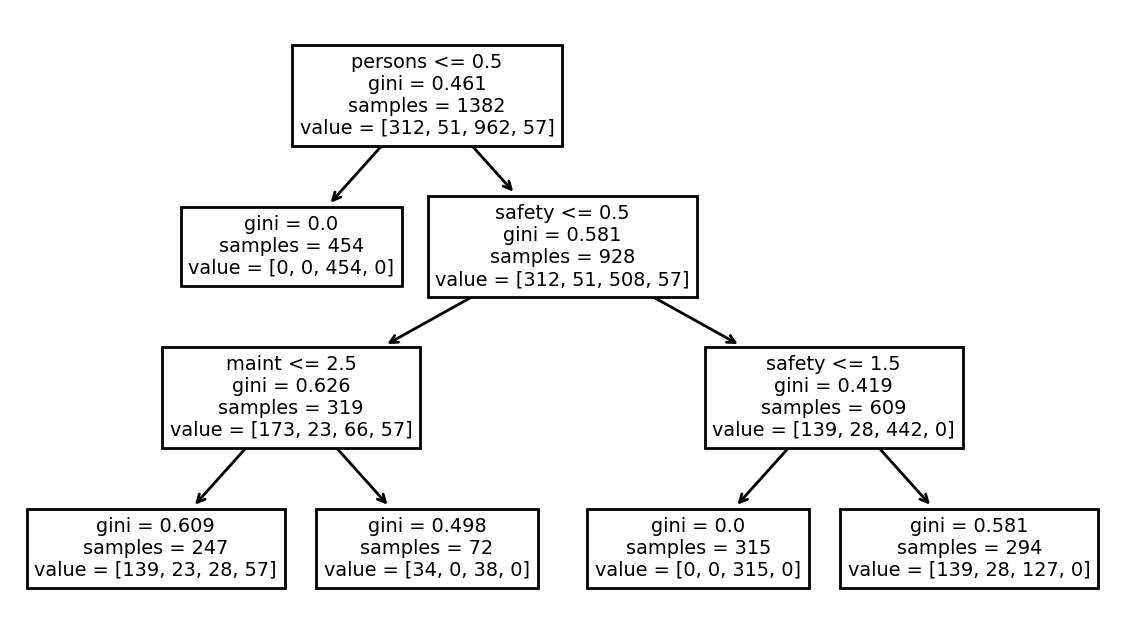

In [67]:
from sklearn.tree import plot_tree
plt.figure(figsize=(7,4),dpi=200)
plot_tree(model, feature_names=df.columns);

In [88]:
y_pred=model.predict(X_test)
r2score=metrics.r2_score(y_pred,y_test)
r2score

0.8437663387043111